In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.drop(columns=["Serial No."],inplace=True)

In [6]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


<AxesSubplot:>

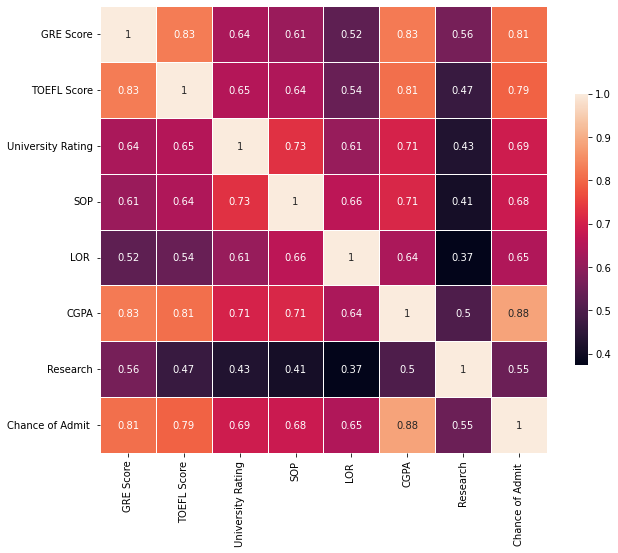

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

size = max(10, len(df.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))

sns.heatmap(df.corr(),annot=True,square=True, linewidths=.5, cbar_kws={"shrink": 0.5})


<AxesSubplot:>

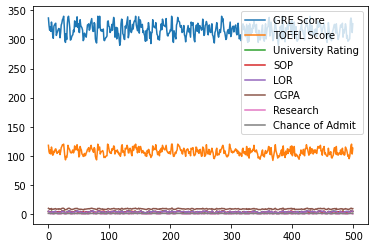

In [8]:
df.plot()#unscaled data

In [9]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
profile.to_file("dfprofile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

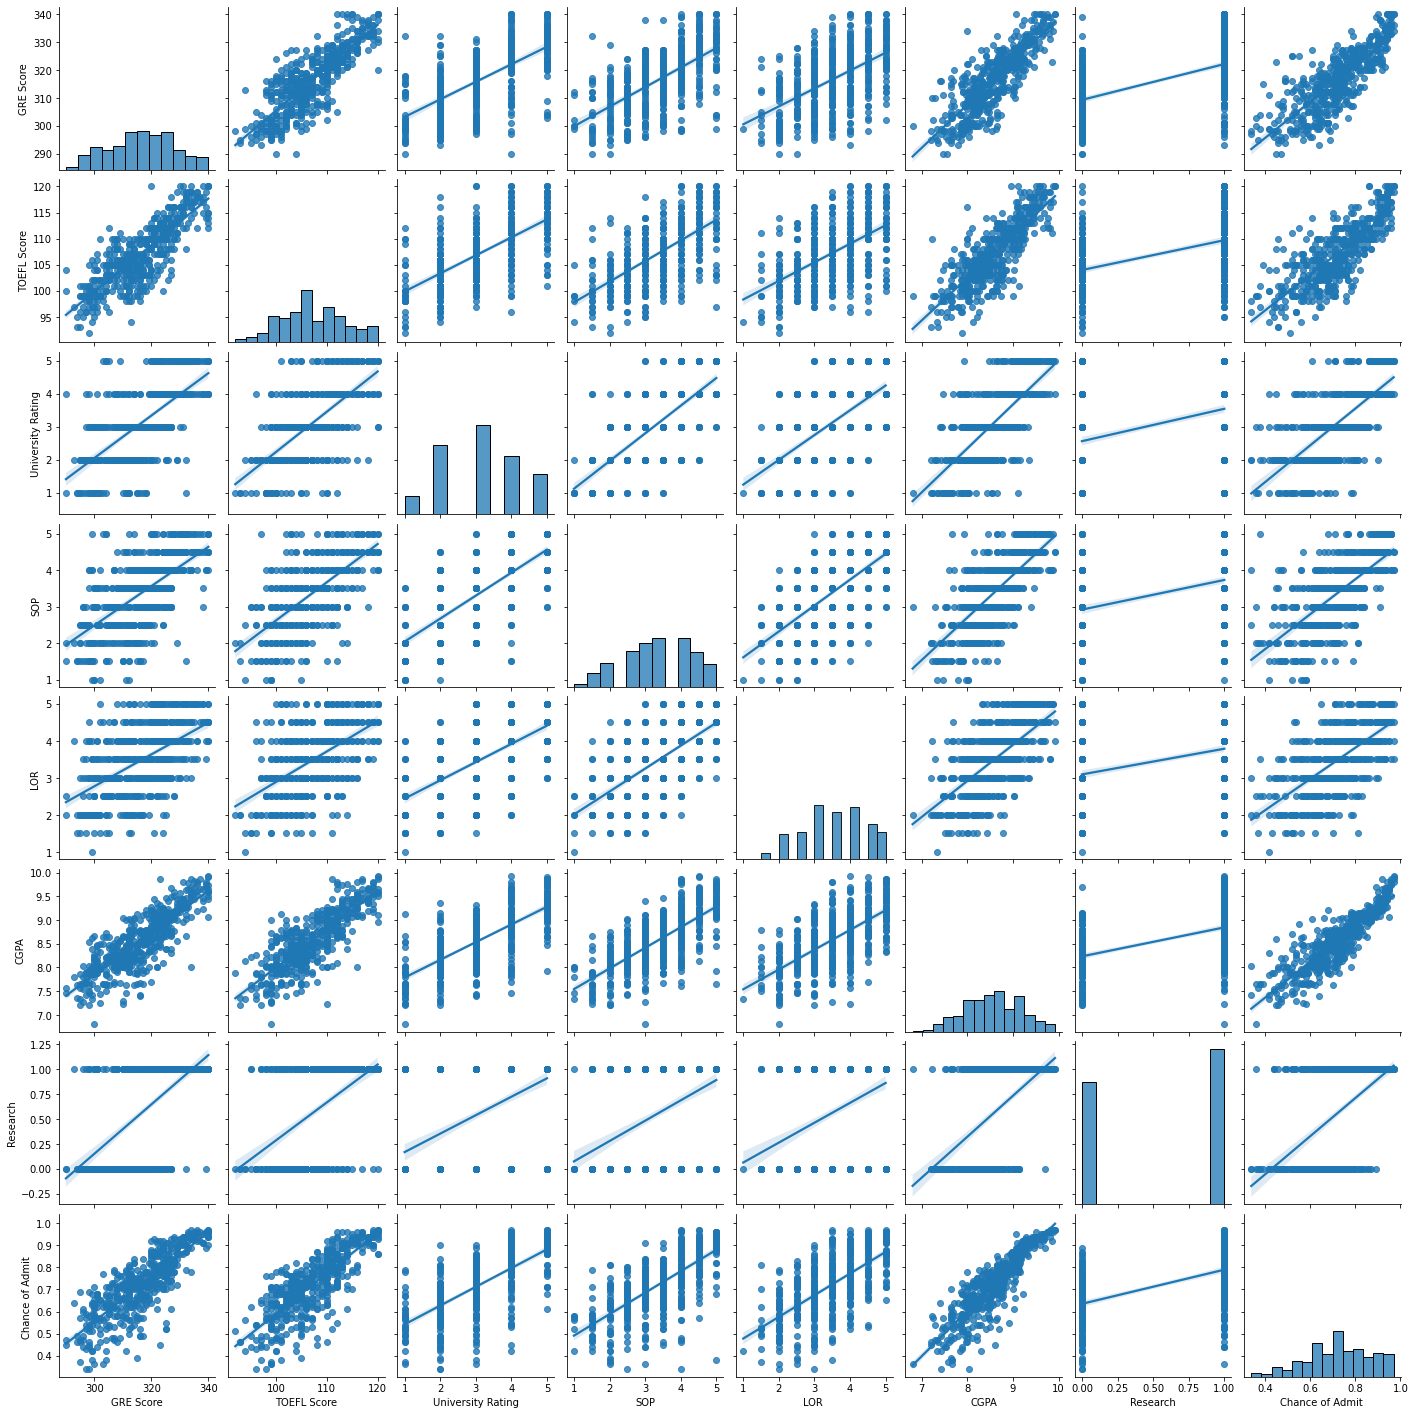

In [10]:
sns.pairplot(df,kind="reg")
plt.show()
 

In [11]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [14]:
xtrain

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [15]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
xtr=s.fit_transform(xtrain)
xte=s.transform(xtest)

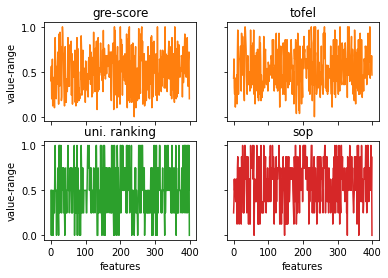

In [16]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(xtr[:,0],'tab:orange')
axs[0, 0].set_title('gre-score')
axs[0, 1].plot(xtr[:,1],'tab:orange')
axs[0, 1].set_title('tofel')
axs[1, 0].plot(xtr[:,2], 'tab:green')
axs[1, 0].set_title('uni. ranking')
axs[1, 1].plot(xtr[:,3], 'tab:red')
axs[1, 1].set_title('sop')

for ax in axs.flat:
    ax.set(xlabel='features', ylabel='value-range')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,initializers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [44]:
model = Sequential()

model.add(Dense(60,activation='relu',input_dim=7,kernel_initializer='he_normal'))

model.add(Dense(28,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(18,activation='relu'))

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='linear'))


In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 60)                480       
_________________________________________________________________
dense_15 (Dense)             (None, 28)                1708      
_________________________________________________________________
dense_16 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_17 (Dense)             (None, 18)                522       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 152       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

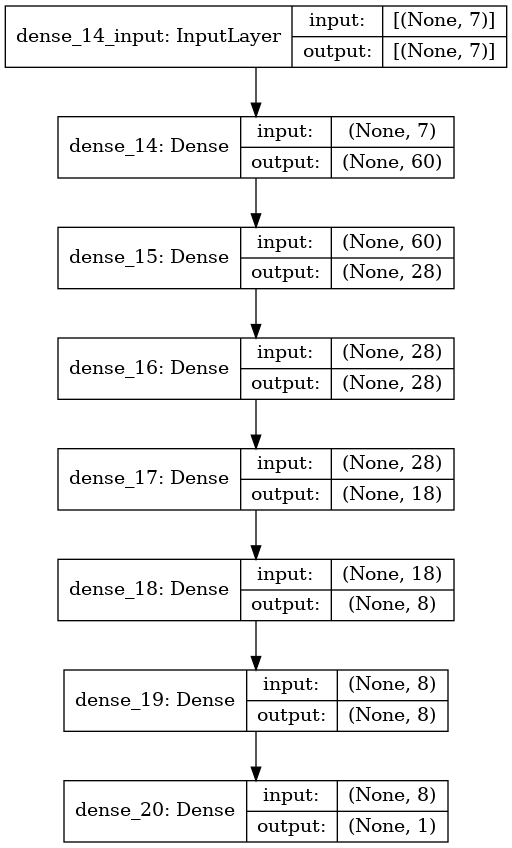

In [46]:
tensorflow.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
 
   
)

In [47]:
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['MeanSquaredError'])

In [48]:
history = model.fit(xtr,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7/100
10/10 [==============

In [49]:
y_pred = model.predict(xte)
y_pred

array([[0.616146  ],
       [0.70436645],
       [0.92284614],
       [0.7103002 ],
       [0.8213998 ],
       [0.67861503],
       [0.7495364 ],
       [0.7374872 ],
       [0.7690548 ],
       [0.65546846],
       [0.6699722 ],
       [0.5590384 ],
       [0.80463105],
       [0.80176455],
       [0.7559087 ],
       [0.8834601 ],
       [0.6077834 ],
       [0.7769219 ],
       [0.90934443],
       [0.642045  ],
       [0.6071506 ],
       [0.7902851 ],
       [0.8360939 ],
       [0.53087026],
       [0.76244557],
       [0.6377969 ],
       [0.9447163 ],
       [0.6429051 ],
       [0.8507698 ],
       [0.6666158 ],
       [0.61223173],
       [0.7980297 ],
       [0.59137404],
       [0.893412  ],
       [0.55202866],
       [0.7890935 ],
       [0.7249306 ],
       [0.67488533],
       [0.6495873 ],
       [0.90885246],
       [0.5182626 ],
       [0.6337366 ],
       [0.7679202 ],
       [0.96780086],
       [0.7549152 ],
       [0.5094911 ],
       [0.6596854 ],
       [0.592

In [50]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred)

0.8130951349752699

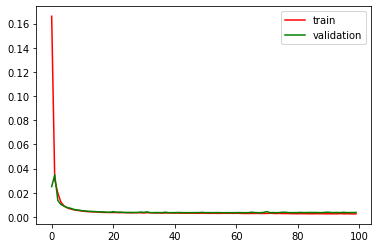

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [26]:
from xgboost import XGBRegressor
model1 = XGBRegressor()
model1.fit(xtr,ytrain)

y_pred1 = model1.predict(xte)
r2_score(ytest,y_pred1)

0.7302364328328357

In [27]:
from sklearn.ensemble import AdaBoostRegressor

m2 = AdaBoostRegressor(n_estimators=100, random_state=0)
m2.fit(xtr,ytrain)
y_pred2 = m2.predict(xte)
r2_score(ytest,y_pred2)


0.7462152993859646

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(xtr,ytrain)
y_pred3 = rf.predict(xte)
r2_score(ytest,y_pred3)

0.769326513386153

Text(0.5, 1.0, 'Visualizing Feature Importances')

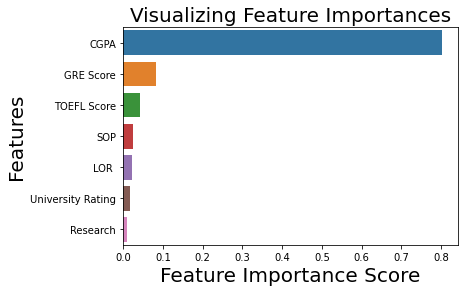

In [29]:
feature_imp = pd.Series(rf.feature_importances_, 
                        index=xtrain.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title("Visualizing Feature Importances", fontsize=20)

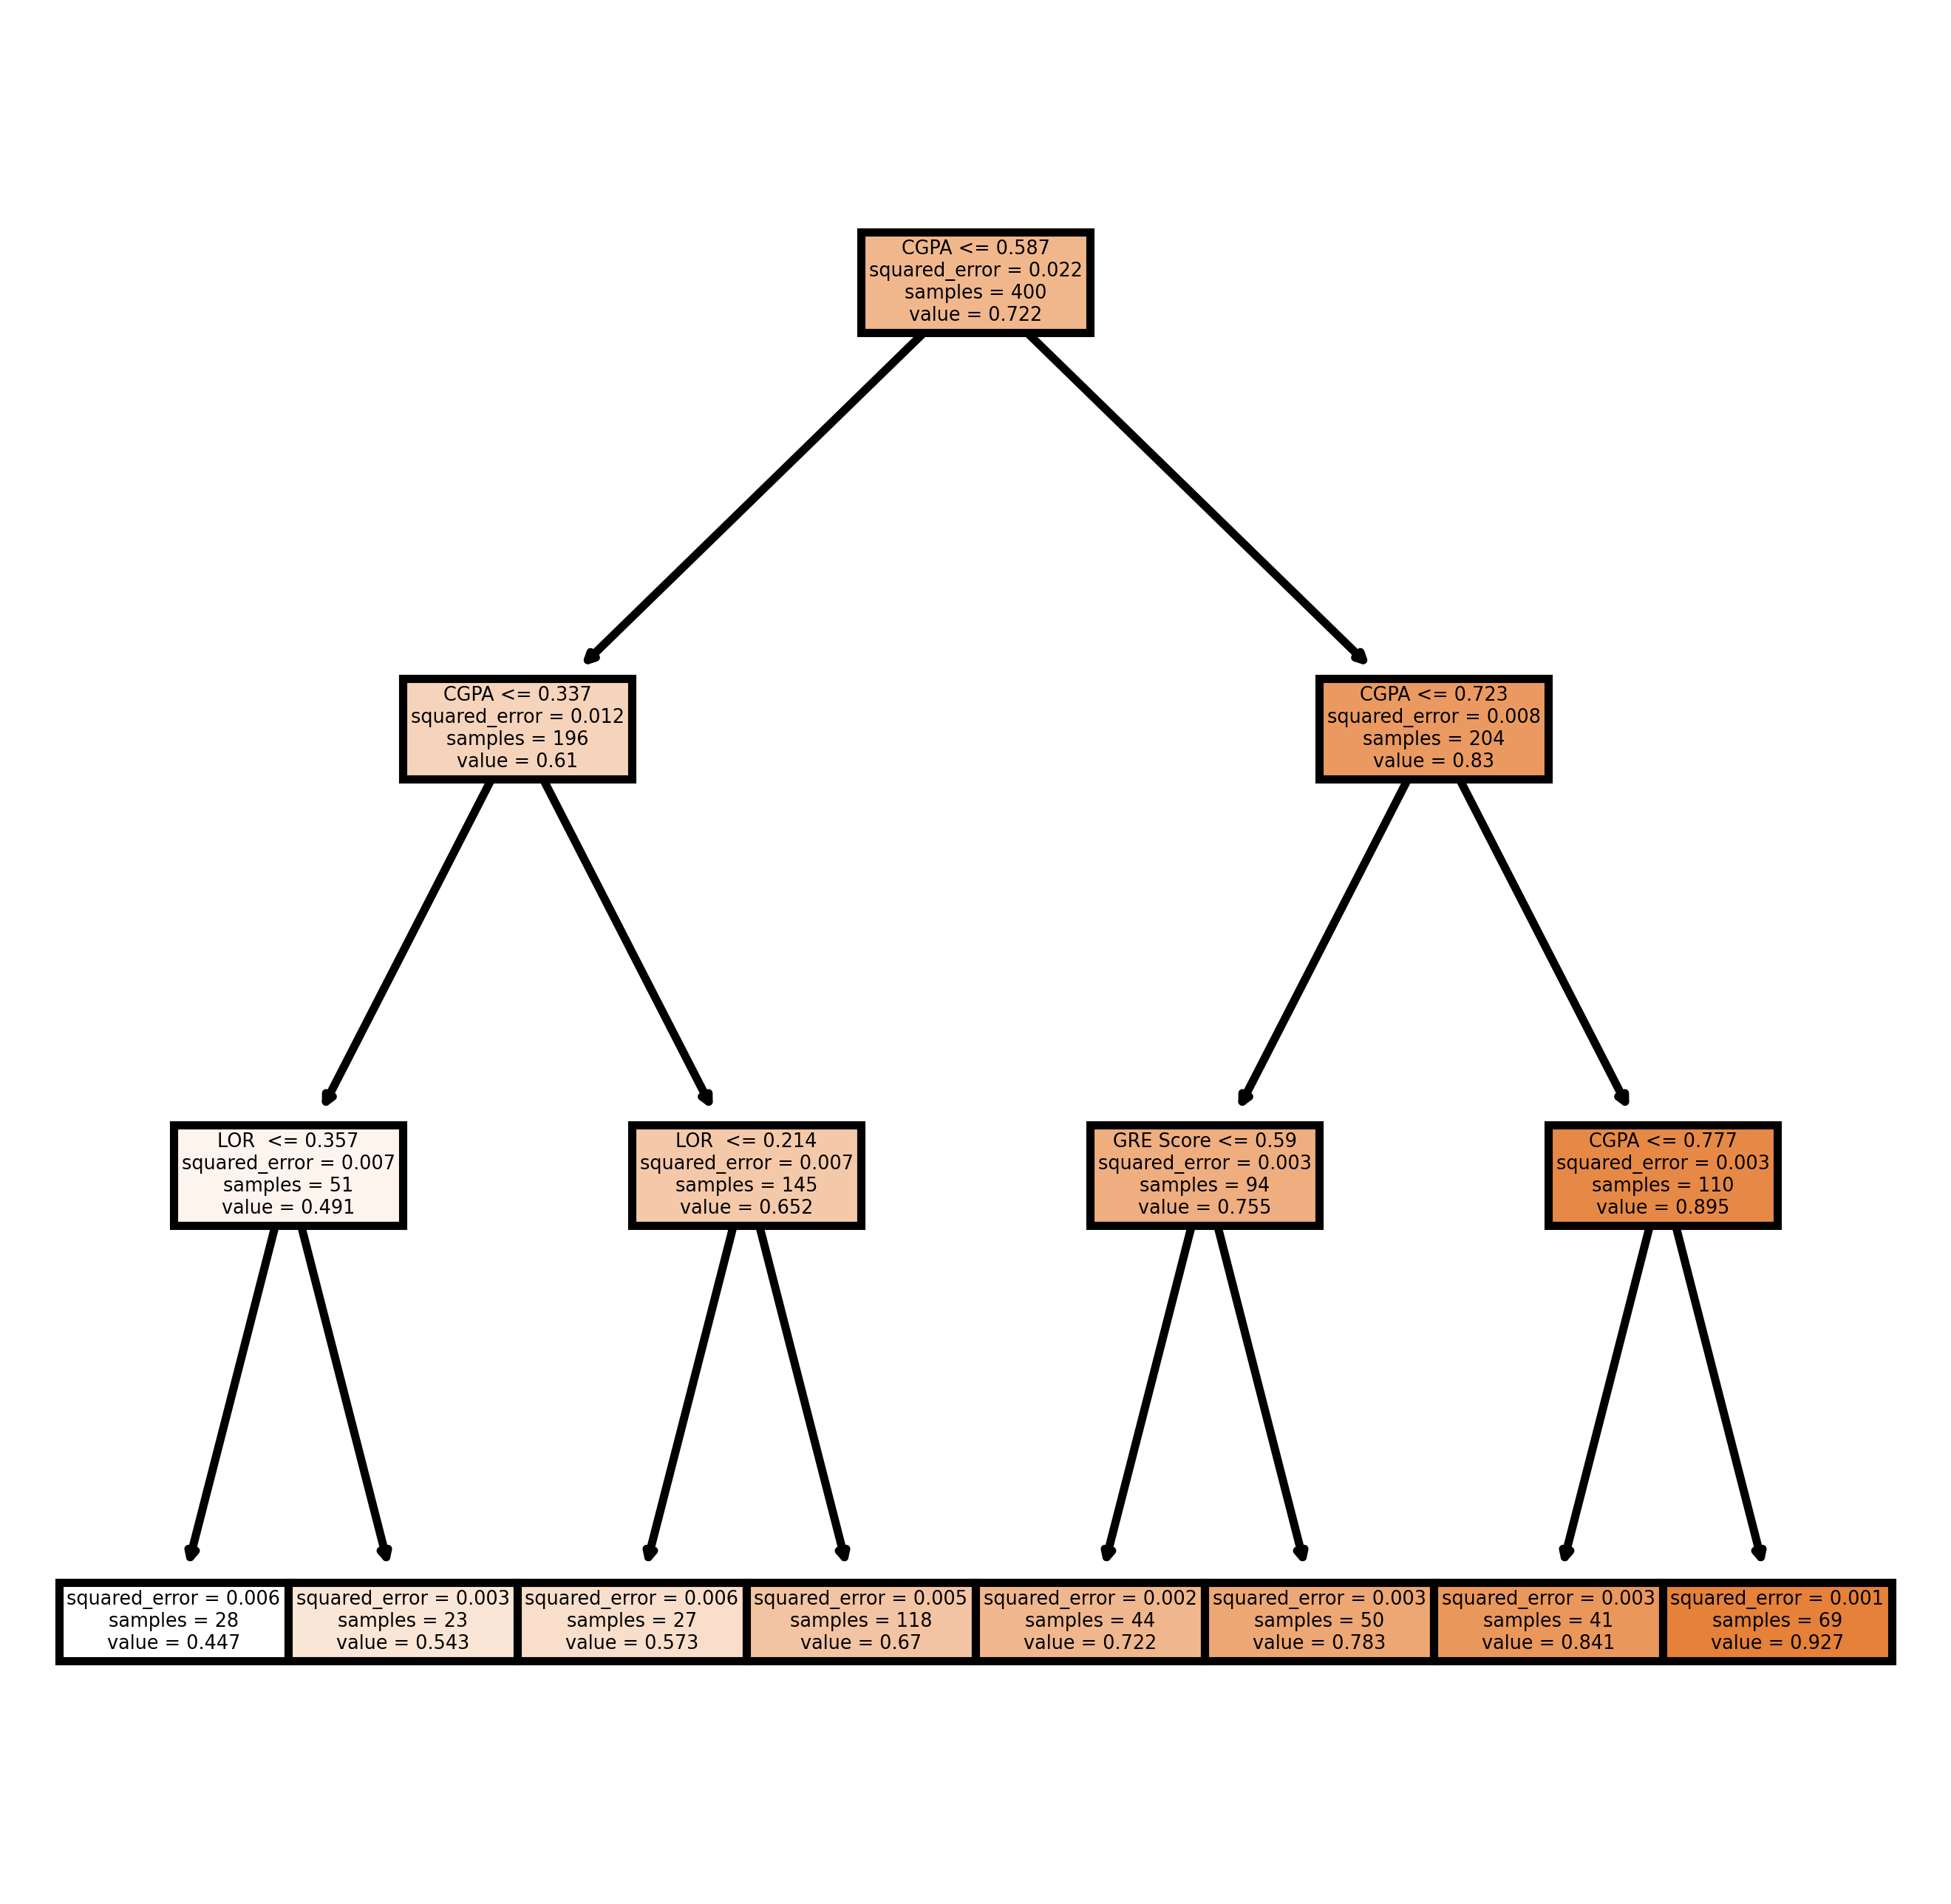

In [60]:
from sklearn import tree
fn=xtrain.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(m2.estimators_[0],
               feature_names = fn, 
               filled = True);
fig.savefig('adaboost_individualtree.png')

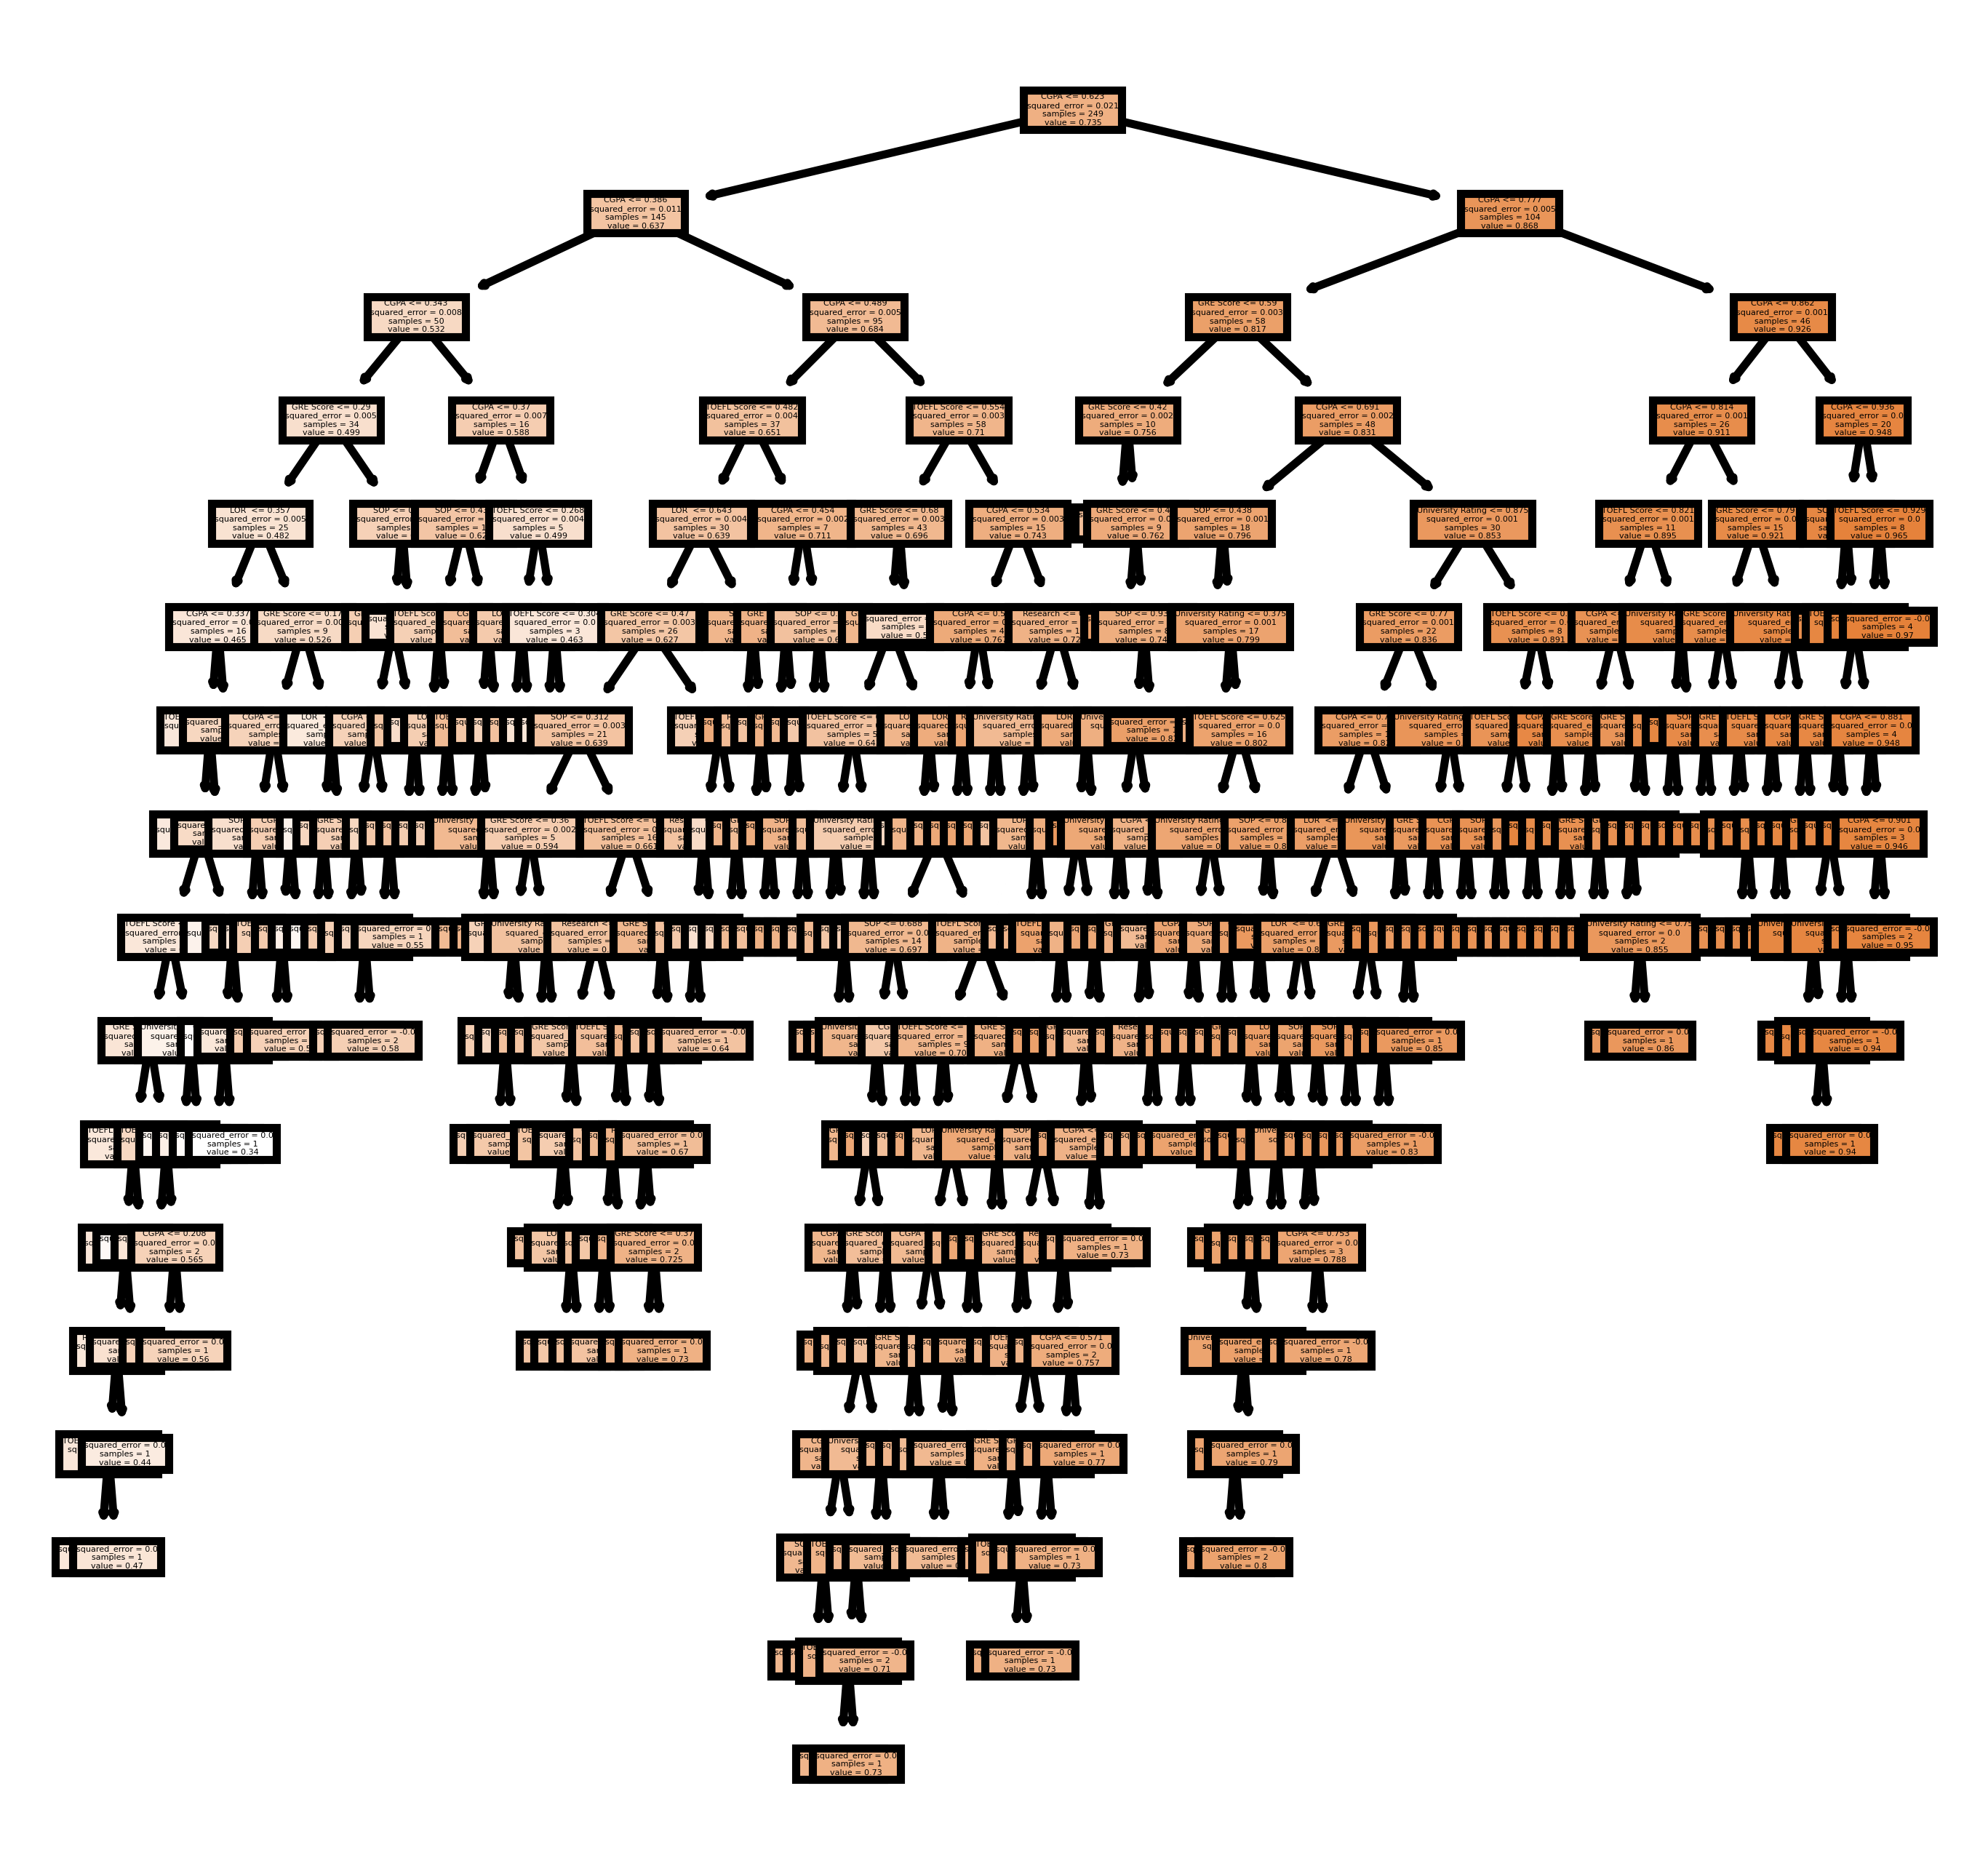

In [63]:
from sklearn import tree
fn=xtrain.columns

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[1],
               feature_names = fn, 
               filled = True);
fig.savefig('rf_individualtree.png')